In [2]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pyproj 
import pandas as pd 

In [3]:
#import bands as separate 1 band raster
band4 = rasterio.open('B4.TIF') #red
band5 = rasterio.open('B5.TIF') #nir

In [4]:
#number of raster rows
band4.height

255

In [5]:
#number of raster columns
band4.width

467

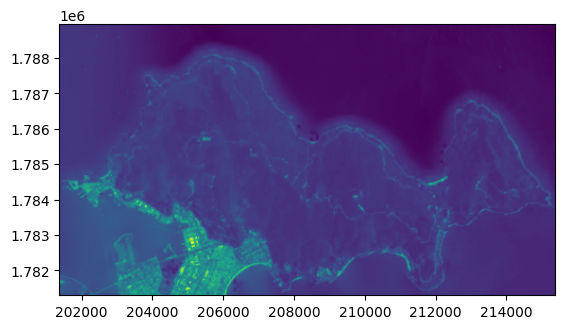

<Axes: >

In [6]:
#plot band 
plot.show(band4)

In [7]:
#type of raster byte
band4.dtypes[0]

'uint16'

In [8]:
#raster sytem of reference
band4.crs

CRS.from_epsg(32649)

In [9]:
#raster transform parameters
band4.transform

Affine(30.0, 0.0, 201375.0,
       0.0, -30.0, 1788945.0)

In [10]:
#raster values as matrix array
band4.read(1)

array([[8624, 8608, 8613, ..., 7245, 7237, 7235],
       [8620, 8607, 8602, ..., 7242, 7253, 7256],
       [8619, 8605, 8599, ..., 7239, 7270, 7254],
       ...,
       [9669, 9674, 9647, ..., 8256, 8240, 8219],
       [9672, 9662, 9657, ..., 8255, 8227, 8257],
       [9657, 9644, 9647, ..., 8232, 8233, 8242]], dtype=uint16)

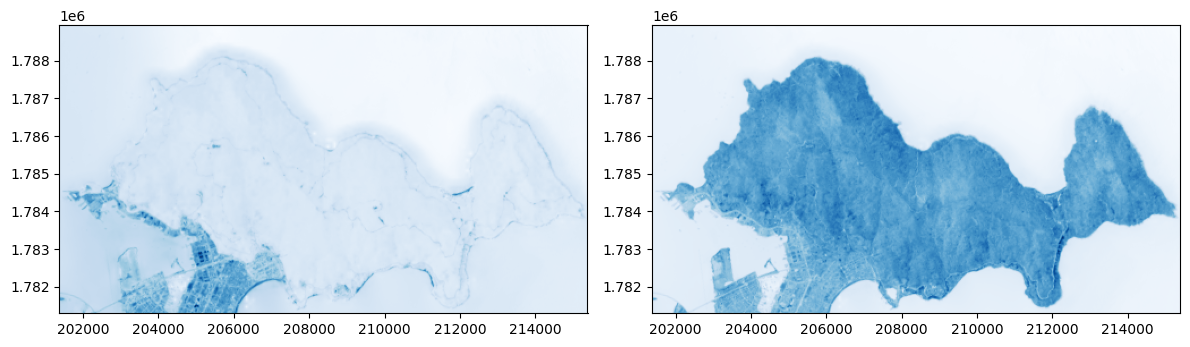

In [11]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [12]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

nir


array([[8441., 8411., 8398., ..., 7249., 7245., 7243.],
       [8425., 8409., 8382., ..., 7238., 7262., 7263.],
       [8413., 8404., 8392., ..., 7238., 7264., 7279.],
       ...,
       [9219., 9221., 9221., ..., 8159., 8150., 8155.],
       [9226., 9207., 9205., ..., 8145., 8138., 8219.],
       [9214., 9209., 9204., ..., 8175., 8141., 8185.]])

In [13]:
red

array([[8624., 8608., 8613., ..., 7245., 7237., 7235.],
       [8620., 8607., 8602., ..., 7242., 7253., 7256.],
       [8619., 8605., 8599., ..., 7239., 7270., 7254.],
       ...,
       [9669., 9674., 9647., ..., 8256., 8240., 8219.],
       [9672., 9662., 9657., ..., 8255., 8227., 8257.],
       [9657., 9644., 9647., ..., 8232., 8233., 8242.]])

In [14]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:10,:10]

array([[-0.0107237 , -0.0115753 , -0.01263888, -0.01093474, -0.00904074,
        -0.01111046, -0.01051025, -0.01068451, -0.0097475 , -0.01093217],
       [-0.01144031, -0.01163611, -0.01295337, -0.01163884, -0.00985106,
        -0.01015914, -0.01138899, -0.01032985, -0.01021726, -0.0100606 ],
       [-0.01209488, -0.01181727, -0.01218292, -0.0124457 , -0.01106234,
        -0.01145644, -0.0113456 , -0.0100358 , -0.01085872, -0.01177718],
       [-0.01198731, -0.01217289, -0.01095148, -0.01050901, -0.01041423,
        -0.01126761, -0.01179785, -0.0093414 , -0.00873234, -0.01055113],
       [-0.01251984, -0.01244424, -0.01146452, -0.01262997, -0.01020887,
        -0.01002286, -0.01215716, -0.01161972, -0.00992192, -0.01223385],
       [-0.01215003, -0.01201994, -0.01103027, -0.0117495 , -0.01071993,
        -0.01055347, -0.01239791, -0.01162518, -0.0107489 , -0.01130077],
       [-0.01233263, -0.01207361, -0.01248754, -0.01220514, -0.01073125,
        -0.01126893, -0.01180894, -0.0110909 

In [15]:
#export ndvi image
ndviImage = rasterio.open('ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

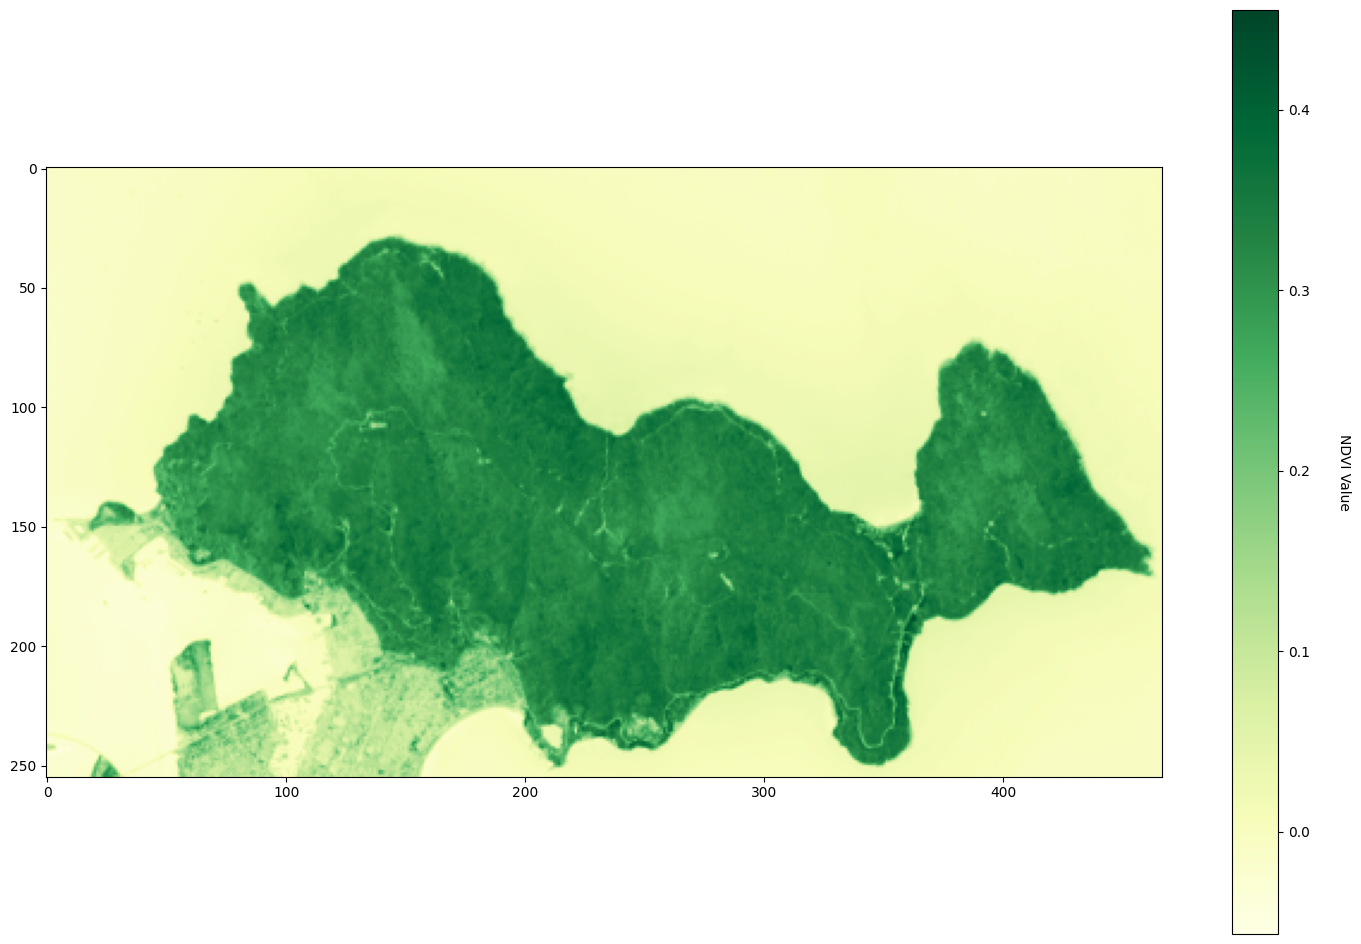

In [16]:
# # plot ndvi
# ndvi = rasterio.open('ndviImage.tiff')
# fig = plt.figure(figsize=(18,12))
# plot.show(ndvi)
# Open the NDVI image
ndvi = rasterio.open('ndviImage.tiff')

# Plot the NDVI image
fig, ax = plt.subplots(figsize=(18, 12))
im = ax.imshow(ndvi.read(1), cmap='YlGn')  # Choose an appropriate colormap

# Add a color bar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('NDVI Value', rotation=270, labelpad=30)

plt.show()

In [17]:


# Mở tệp TIFF
with rasterio.open('B4.tif') as src:
    # Lấy thông tin biến đổi (transform)
    transform = src.transform
    
    # Lấy kích thước của ảnh
    height, width = src.shape
    
    # Tính kinh độ và vĩ độ cho góc trái trên và góc phải dưới
    lon1, lat1 = transform * (0, 0)
    lon2, lat2 = transform * (width, height)
    
print("Kích thước ảnh: {} hàng x {} cột".format(height, width))
print("Góc trái trên (lon, lat): ({}, {})".format(lon1, lat1))
print("Góc phải dưới (lon, lat): ({}, {})".format(lon2, lat2))


Kích thước ảnh: 255 hàng x 467 cột
Góc trái trên (lon, lat): (201375.0, 1788945.0)
Góc phải dưới (lon, lat): (215385.0, 1781295.0)


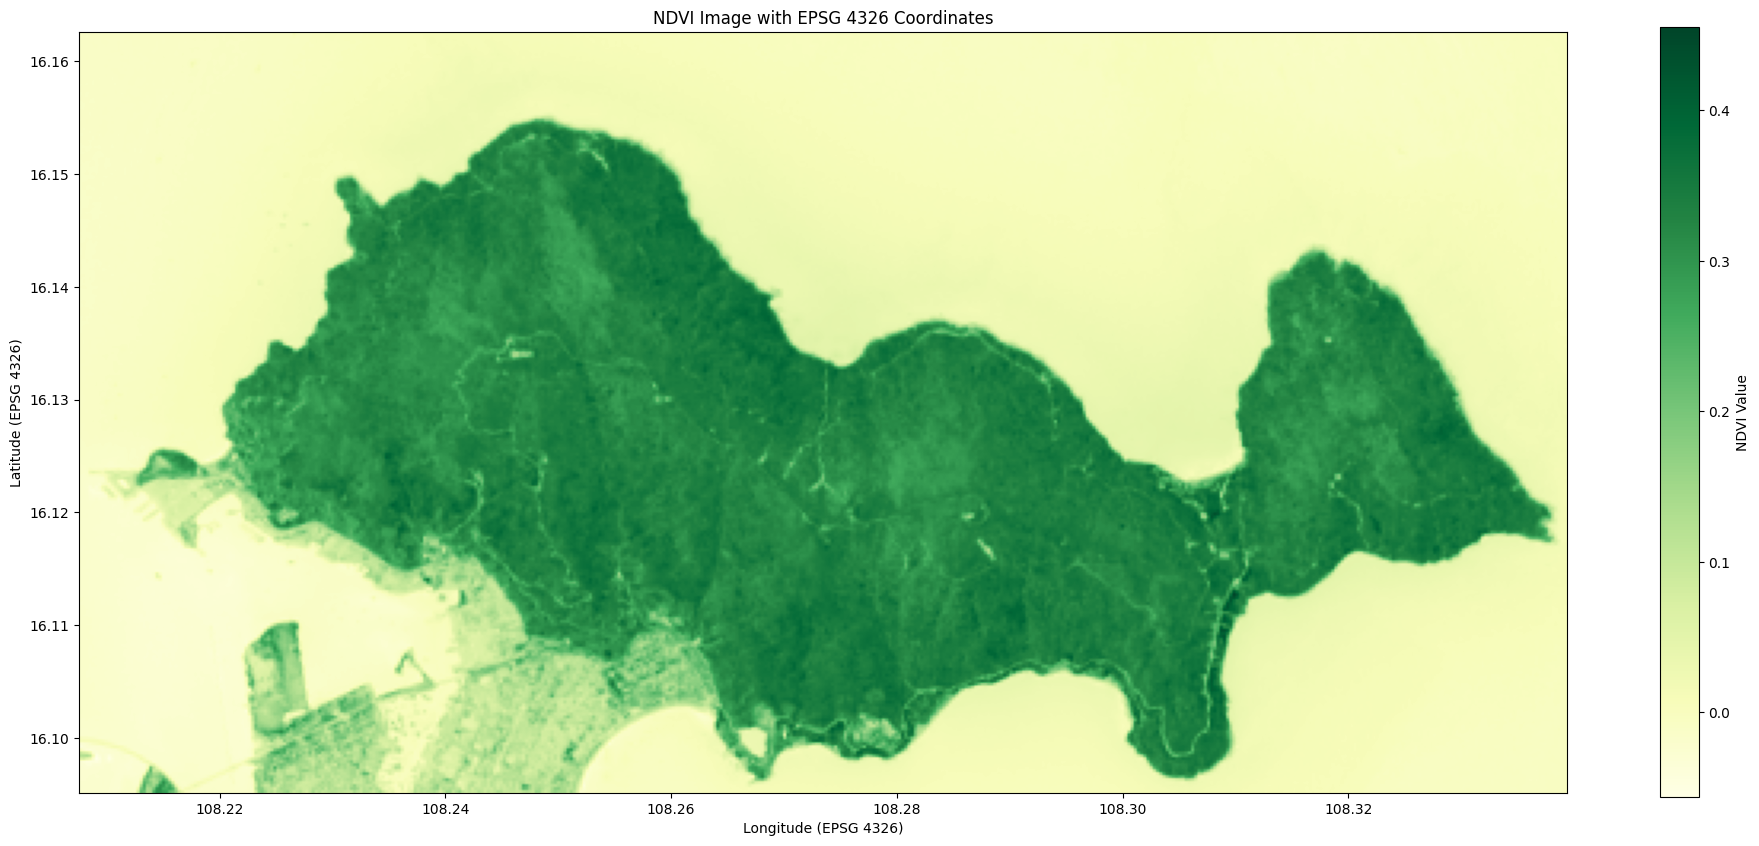

In [18]:


# Mở tệp TIFF
with rasterio.open('ndviImage.tiff') as src:
    # Lấy thông tin biến đổi (transform)
    transform = src.transform
    
    # Xác định hệ tọa độ ban đầu
    src_crs = src.crs
    
    # Lấy kích thước của ảnh
    height, width = src.shape

    # Đọc dữ liệu từ tệp TIFF
    data = src.read(1)
    
# Xác định hệ tọa độ EPSG 4326
target_crs = pyproj.CRS("EPSG:4326")

# Tạo một biến đổi từ hệ tọa độ ban đầu sang EPSG 4326
transformer = pyproj.Transformer.from_crs(src_crs, target_crs, always_xy=True)

# Tính toán tọa độ của các góc
lon1, lat1 = transformer.transform(*transform * (0, 0))
lon2, lat2 = transformer.transform(*transform * (width, height))

# Tạo biểu đồ và hiển thị ảnh vùng miền
fig, ax = plt.subplots(figsize=(24, 10))
im = ax.imshow(data, extent=(lon1, lon2, lat2, lat1), cmap='YlGn', origin='upper')
plt.colorbar(im, ax=ax, label='NDVI Value')

ax.set_xlabel('Longitude (EPSG 4326)')
ax.set_ylabel('Latitude (EPSG 4326)')
plt.title('NDVI Image with EPSG 4326 Coordinates')

plt.show()


In [19]:
im.get_array().shape

(255, 467)

In [20]:


# Mở tệp TIFF
with rasterio.open('B4.tif') as src:
    # Lấy thông tin biến đổi (transform)
    transform = src.transform
    
    # Xác định hệ tọa độ ban đầu
    src_crs = src.crs
    
    # Lấy kích thước của ảnh
    height, width = src.shape
    
    # Tính kinh độ và vĩ độ cho góc trái trên và góc phải dưới trong hệ tọa độ ban đầu
    lon1, lat1 = transform * (0, 0)
    lon2, lat2 = transform * (width, height)

# Xác định hệ tọa độ EPSG 4326
target_crs = pyproj.CRS("EPSG:4326")

# Tạo một biến đổi từ hệ tọa độ ban đầu sang EPSG 4326
transformer = pyproj.Transformer.from_crs(src_crs, target_crs, always_xy=True)

# Thực hiện chuyển đổi tọa độ
lon1_wgs84, lat1_wgs84 = transformer.transform(lon1, lat1)
lon2_wgs84, lat2_wgs84 = transformer.transform(lon2, lat2)

print("Tọa độ theo EPSG 4326:")
print("Góc trái trên (lon, lat): ({}, {})".format(lon1_wgs84, lat1_wgs84))
print("Góc phải dưới (lon, lat): ({}, {})".format(lon2_wgs84, lat2_wgs84))


Tọa độ theo EPSG 4326:
Góc trái trên (lon, lat): (108.20756335896627, 16.162570625413274)
Góc phải dưới (lon, lat): (108.33938885247932, 16.095164778635564)


In [21]:
# Tạo mảng giá trị cho hàng và cột
im_array = im.get_array()

num_rows = 255
num_cols = 467
 
start_lat = 16.162570625413274
end_lat = 16.095164778635564

start_lon = 108.20756335896627
end_lon = 108.33938885247932

lat_values = np.linspace(start_lat, end_lat, num_rows)
lon_values = np.linspace(start_lon, end_lon, num_cols)


ndvi_values = im_array.flatten()

# Create meshgrid of latitudes and longitudes
lats, lons = np.meshgrid(lon_values, lat_values)
lat_values_flat = lats.flatten()
lon_values_flat = lons.flatten()

# Create DataFrame
df = pd.DataFrame({
    'lat': lat_values_flat,
    'lon': lon_values_flat,
    'NDVI': ndvi_values
})

df.to_csv("NDVI.csv", index = False)